In [16]:
#Pavan kalyan ------------------- sample()

In [2]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 


OneHotEncoder()

In [4]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'./input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [5]:
paths = []
for r, d, f in os.walk(r"./input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [6]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [7]:
result = np.array(result)
result = result.reshape(139,2)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [10]:
y_train.shape

(111, 2)

In [11]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 14s 4s/step - loss: 46.2125 - val_loss: 114.6916
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 20.1808 - val_loss: 12.8608
Epoch 3/30
3/3 [==============================] - 8s 3s/step - loss: 8.6017 - val_loss: 10.6796
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 5.0723 - val_loss: 8.0457
Epoch 5/30
3/3 [==============================] - 8s 3s/step - loss: 2.4234 - val_loss: 3.5837
Epoch 6/30
3/3 [==============================] - 8s 2s/step - loss: 2.1087 - val_loss: 4.8323
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 1.2369 - val_loss: 6.9549
Epoch 8/30
3/3 [==============================] - 7s 2s/step - loss: 1.5697 - val_loss: 9.1033
Epoch 9/30
3/3 [==============================] - 7s 2s/step - loss: 1.0834 - val_loss: 9.4592
Epoch 10/30
3/3 [==============================] - 8s 2s/step - loss: 0.4502 - val_loss: 7.0037
Epoch 11/30
3/3 [=========================

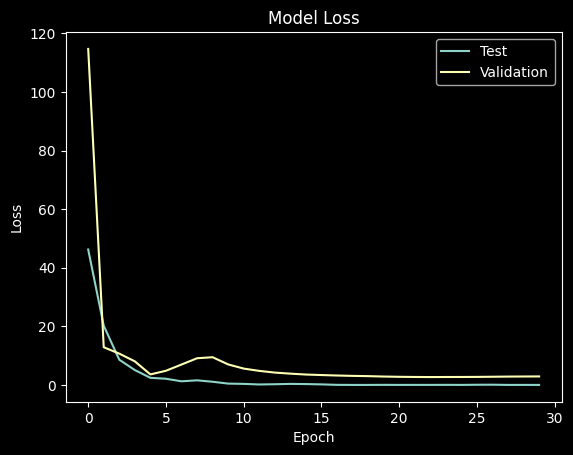

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [13]:
def names(number):
    if number == 0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'    
    

100.0% This Is No, Its not a tumor


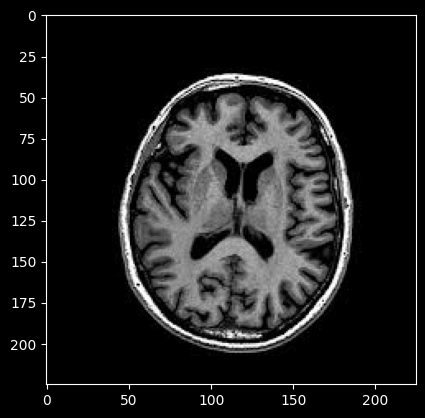

In [14]:
from matplotlib.pyplot import imshow
img = Image.open(r"./input/brain-mri-images-for-brain-tumor-detection/no/37 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% This Is ' + names(classification))

99.96552467346191% This Is A Its a Tumor


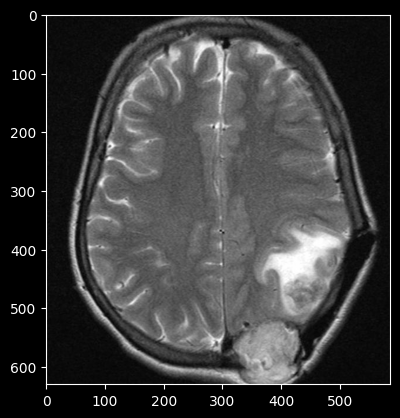

In [15]:
from matplotlib.pyplot import imshow
img = Image.open(r"./input/brain-mri-images-for-brain-tumor-detection/yes/Y102.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% This Is A ' + names(classification))